# Linear Regression

**In this problem, we will implement least squares linear regression to predict density of wine based on its
acidity. Recall that the error metric for least squares is given by:
J(θ) = 1
2m
m∑
i=1
(y(i) − hθ (x(i)))2
where hθ (x) = θT x is the hypothesis function. The files linearX.csv and linearY.csv
contain the acidity of the wine (x(i)’s, x(i) ∈ R) and its density (y(i)’s, y(i) ∈ R), respectively, with
one training example per row. We will implement least squares linear regression to learn the relationship
between x(i)’s and y(i)’s**

# Libraries, Functions and Data Read

In [5]:
## libraries
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from IPython.display import clear_output
import time
import cv2
import os
import imageio


In [6]:
def training(X,Y,learning_rate,l_threshold,iteration = 1000000):
    grad=0
    theta = np.zeros((2, 1))
    (loss_values,theta0,theta1,Y_val,theta_or) = ([],[],[],[],[])
    (loss_time, theta0_time, theta_1_time) = ([],[],[])
    theta_or.append(theta)
    theta0.append(theta[0][0])
    theta1.append(theta[1][0])
    theta0_time.append(theta[0][0])
    theta_1_time.append(theta[1][0])
    for i in range(1,iteration):
        current_time = time.time()
        y_predictions = X.dot(theta)
        grad = -2 * X.T.dot(Y - y_predictions) / len(X)
        adap_learning_rate = learning_rate / (np.sqrt(i))
        theta = theta - adap_learning_rate * grad
        theta_or.append(theta)
        theta0.append(theta[0][0])
        theta1.append(theta[1][0])
        Y_val.append(y_predictions)
        loss = np.sum((Y - y_predictions)**2) / len(X)
        loss_values.append(loss)
        loss_time.append(loss)
        theta0_time.append(theta[0][0])
        theta_1_time.append(theta[1][0])
        if (i>1):
            if ((round(abs(loss_values[i-1]-loss_values[i-2]),20)) < l_threshold):
                break
    bias = theta[0][0]
    weight = theta[1][0]
    print("Optimized parameters:")
    print("Theta_0:", bias)
    print("Theta_1:", weight)
    print("Loss:", loss)
    print("No of iteration:", i)
    print("Learning Rate:", adap_learning_rate)
    return theta,loss_values,theta0,theta1,Y_val,theta_or,loss_time, theta0_time, theta_1_time

def training_fixed_lr(X,Y,learning_rate,l_threshold,iteration = 1000000):
    grad=0
    theta = np.zeros((2, 1))
    (loss_values,theta0,theta1,Y_val,theta_or) = ([],[],[],[],[])
    theta_or.append(theta)
    theta0.append(theta[0][0])
    theta1.append(theta[1][0])
    for i in range(1,iteration):
        y_predictions = X.dot(theta)
        grad = -2 * X.T.dot(Y - y_predictions) / len(X)
        theta = theta - learning_rate * grad
        theta_or.append(theta)
        theta0.append(theta[0][0])
        theta1.append(theta[1][0])
        Y_val.append(y_predictions)
        loss = np.sum((Y - y_predictions)**2) / len(X)
        loss_values.append(loss)
        if (i>1):
            if ((round(abs(loss_values[i-1]-loss_values[i-2]),20)) < l_threshold):
                break
    bias = theta[0][0]
    weight = theta[1][0]
    print("Optimized parameters:")
    print("Bias:", bias)
    print("Weight:", weight)
    print("Loss:", loss)
    print("No of iteration:", i)
    print("Learning Rate:", learning_rate)
    return theta,loss_values,theta0,theta1,Y_val,theta_or

def plot_scatter(z,theta):
    plt.scatter(DATA1, DATA2 , color='tab:blue', marker='o')
    plt.title('Wine data Acidity Vs Density')
    plt.xlabel('DATA1')
    plt.ylabel('DATA2')
    plt.grid(True)
    plt.plot(DATA1,z,color='tab:red')

def cost_function(theta0, theta1, X, y):
    m = len(y)
    predictions = theta0 + theta1 * X
    return np.sum((y - predictions)**2) / m

def mesh_grid_traverse(min_th,max_th,sp_,theta0,theta1,loss_values,X, Y):
    th0_r = np.linspace(-max(abs(min(theta0)),abs(max(theta0))), max(abs(min(theta0)),abs(max(theta0))), sp_) 
    th1_r = np.linspace(-max(abs(min(theta1)),abs(max(theta1))), max(abs(min(theta1)),abs(max(theta1))), sp_)
    theta0_grid, theta1_grid = np.meshgrid(th0_r, th1_r)
    cost_grid = np.zeros_like(theta0_grid)
    for i in range(len(th0_r)):
        for j in range(len(th1_r)):
            cost_grid[i, j] = cost_function(th0_r[i], th1_r[j], X, Y)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(theta0_grid, theta1_grid, cost_grid,cmap = cm.coolwarm, alpha=0.5 ) #'viridis'  cmap = cm.coolwarm
    frame_directory = 'frames1'
    for i in range(40):
        ax.plot(theta0[i], theta1[i], loss_values[i], linestyle='-', color='r', marker='o', markersize=5 ) #'rs'
        display(plt.gcf())
        plt.title(f"Frame {i + 1}/40")
        plt.savefig(f'{frame_directory}/frame_{i:04d}.png')
        ax.set_xlabel('Theta_0')
        ax.set_ylabel('Theta_1')
        ax.set_zlabel('Loss J(0)')
        clear_output(wait=True)
        time.sleep(0.1)
    ax.set_xlabel('Theta_0')
    ax.set_ylabel('Theta_1')
    ax.set_zlabel('Loss J(0)')
    plt.title('3D Mesh plot of Error function')
    plt.show()
    
    frames_directory = 'frames1'
    output_gif = 'Mesh.gif'
    frame_filenames = sorted([f for f in os.listdir(frames_directory) if f.endswith('.png')])
    frames = []
    for frame_filename in frame_filenames:
        frame_path = os.path.join(frames_directory, frame_filename)
        frame = imageio.imread(frame_path)
        frames.append(frame)
        
    imageio.mimsave(output_gif, frames, duration=0.2)
    
    print(f'GIF saved as {output_gif}')
    return th0_r,th1_r,cost_grid


def cost_contour(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def contour_plot (min_th, max_th, n, theta_values, lv, n1, n2, n_step, ts, c_t):
    slope_range = np.linspace(min_th, max_th, n)
    intercept_range = np.linspace(min_th,max_th, n)
    slope_grid, intercept_grid = np.meshgrid(slope_range, intercept_range)

    error_grid = np.empty_like(slope_grid)
    for i in range(len(slope_range)):
        for j in range(len(intercept_range)):
            y_pred = slope_grid[i, j] * DATA1_NOR + intercept_grid[i, j]
            error_grid[i, j] = cost_contour(DATA2, y_pred)

    plt.figure(figsize=(10, 6))
    contour = plt.contourf(intercept_grid, slope_grid, error_grid, levels=lv, cmap='viridis')
    plt.colorbar(contour)
    a=list(zip(*theta_values))
    a1,a2 = a[0], a[1]
    plt.plot(a1[0],a2[0],marker='o', color='g')
    k = 0

    frame_directory = 'frames'
    for i in range(n1, n2, n_step):
        plt.plot(a1[i],a2[i], marker='o', color='g')
        print(a1[i],a2[i])
        display(plt.gcf())
        plt.title(f"Frame {k}")
        plt.xlabel('Theta_0')
        plt.ylabel('Theta_1')
        plt.savefig(f'{frame_directory}/frame_{i:04d}.png')
        clear_output(wait=True)
        time.sleep(ts)
        k += 1
    
    plt.title('Contour Plot of Error Function')
    plt.show()
    
    frames_directory = 'frames'
    output_gif = 'output' +str(c_t) + '.gif'
    frame_filenames = sorted([f for f in os.listdir(frames_directory) if f.endswith('.png')])
    frames = []
    for frame_filename in frame_filenames:
        frame_path = os.path.join(frames_directory, frame_filename)
        frame = imageio.imread(frame_path)
        frames.append(frame)
    imageio.mimsave(output_gif, frames, duration=0.1)
    
    print(f'GIF saved as {output_gif}')

In [7]:
X_=pd.read_csv("data/q1/linearX.csv",header=None)
Y=pd.read_csv("data/q1/linearY.csv",header=None)
Wine_data = pd.concat([X_, Y], axis=1)
Wine_data.columns=['Acidity','Density']

DATA1=np.array(Wine_data.Acidity).reshape(-1,1)
DATA2=np.array(Wine_data.Density).reshape(-1,1)

DATA1_NOR = (DATA1-np.mean(DATA1))/np.std(DATA1)

# Assignment Questions:

**1.(a) (8 points) Implement batch gradient descent method for optimizing J(θ). Choose an appropriate
learning rate and the stopping criteria (as a function of the change in the value of J(θ)). You can
initialize the parameters as θ = ~0 (the vector of all zeros). Do not forget to include the intercept
term. Report your learning rate, stopping criteria and the final set of parameters obtained by your
algorithm.**

In [8]:
X = np.c_[np.ones((100, 1)), DATA1_NOR]
theta,loss_values,theta0,theta1,Y_val,theta_or,loss_time, theta0_time, theta_1_time = training(X,DATA2,0.1,np.array([10e-10]),iteration = 1000000)

Optimized parameters:
Theta_0: 0.9963950415594742
Theta_1: 0.0013398933731740858
Loss: 2.441193300477252e-06
No of iteration: 456
Learning Rate: 0.00468292905790847


**(b) (3 points) Plot the data on a two-dimensional graph and plot the hypothesis function learned by your
algorithm in the previous part.**

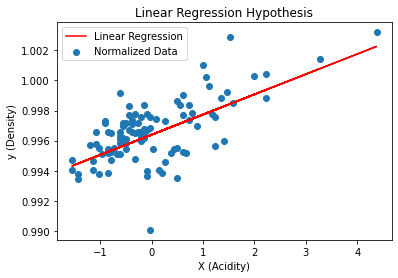

In [9]:
z = X.dot(theta)
plt.scatter(DATA1_NOR, DATA2, label='Normalized Data')
plt.plot(DATA1_NOR, z, color='red', label='Linear Regression')
plt.xlabel('X (Acidity)')
plt.ylabel('y (Density)')
plt.title('Linear Regression Hypothesis')
plt.legend()
plt.show()

**(c) (3 points) Draw a 3-dimensional mesh showing the error function (J(θ)) on z-axis and the parameters
in the x − y plane. Display the error value using the current set of parameters at each iteration of
the gradient descent. Include a time gap of 0.2 seconds in your display for each iteration so that the
change in the function value can be observed by the human eye.**

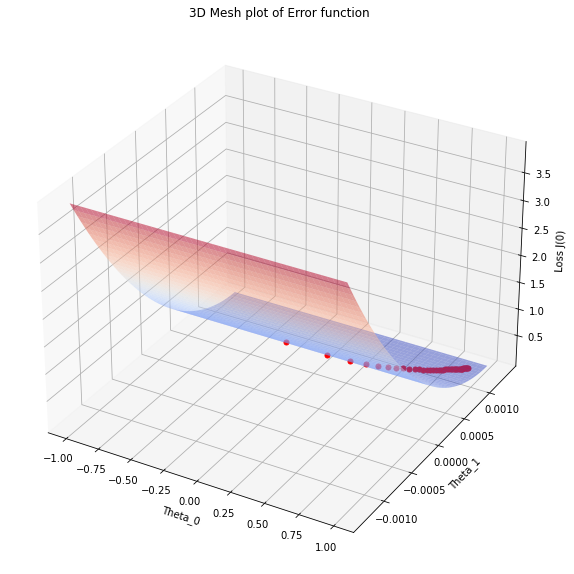

GIF saved as Mesh.gif


In [10]:
k = mesh_grid_traverse(-1,1,100,theta0,theta1,loss_values,DATA1_NOR, DATA2)

**(d) (3 points) Repeat the part above for drawing the contours of the error function at each iteration of
the gradient descent. Once again, chose a time gap of 0.2 seconds so that the change be perceived by
the human eye.(Note here plot will be 2-D)**

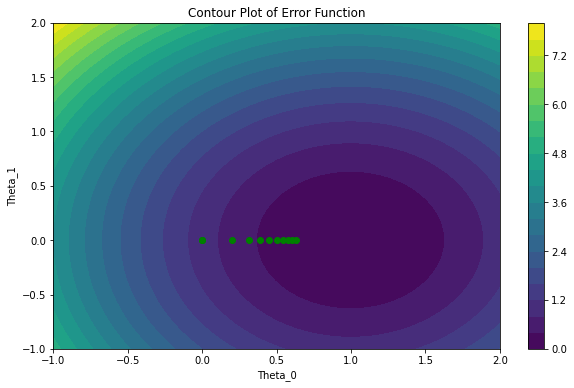

GIF saved as output0.gif


In [12]:
X = np.c_[np.ones((100, 1)), DATA1_NOR]
(theta,loss_values,theta0,theta1,Y_val,theta_or,loss_time, theta0_time, theta_1_time) = training(X,DATA2,0.1,np.array([10e-10]),iteration = 1000000)
contour_plot (-1, 2, 500, theta_or, 20, 0, 10, 1, 0.1,0)

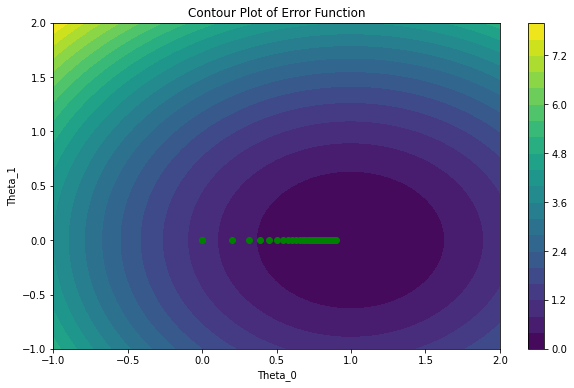

GIF saved as output1.gif


In [8]:
contour_plot (-1, 2, 500, theta_or, 20, 0, 40, 1, 0.1,1)

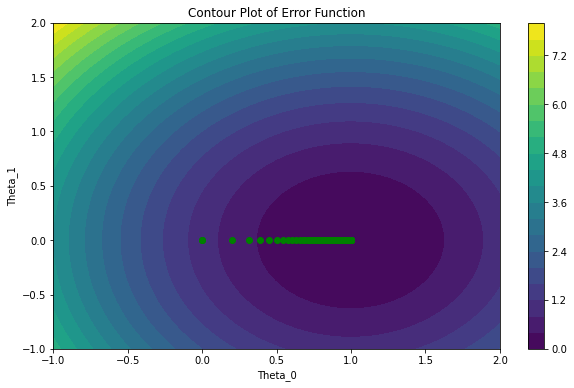

GIF saved as output2.gif


In [9]:
contour_plot (-1, 2, 500, theta_or, 20, 0, 400, 1, 0.001, 2)

**(e) (3 points) Repeat the part above (i.e. draw the contours at each learning iteration) for the step size
values of η = {0.001, 0.025, 0.1}. What do you observe? Comment.**

In [10]:
X = np.c_[np.ones((100, 1)), DATA1_NOR]
(theta,loss_values,theta0,theta1,Y_val,theta_or) = training_fixed_lr(X,DATA2,0.001,np.array([10e-10]),iteration = 1000000)

Optimized parameters:
Bias: 0.9961221394820524
Weight: 0.0013395263905318492
Loss: 2.6385395918431e-06
No of iteration: 3797
Learning Rate: 0.001


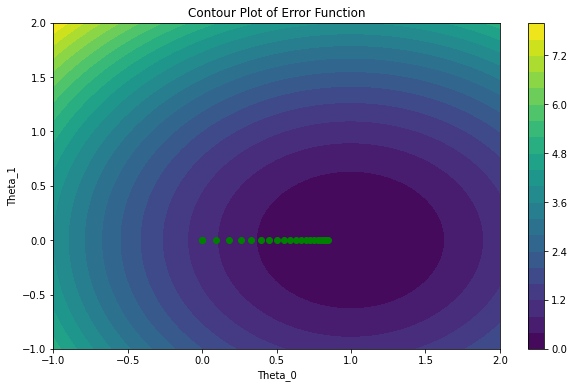

GIF saved as output3.gif


In [11]:
contour_plot (-1, 2, 500, theta_or, 20, 0, 1000, 50, 0.1, 3)

In [12]:
X = np.c_[np.ones((100, 1)), DATA1_NOR]
(theta,loss_values,theta0,theta1,Y_val,theta_or) = training_fixed_lr(X,DATA2,0.025,np.array([10e-10]),iteration = 1000000)

Optimized parameters:
Bias: 0.9965321520330742
Weight: 0.0013400777512644084
Loss: 2.398150102713574e-06
No of iteration: 182
Learning Rate: 0.025


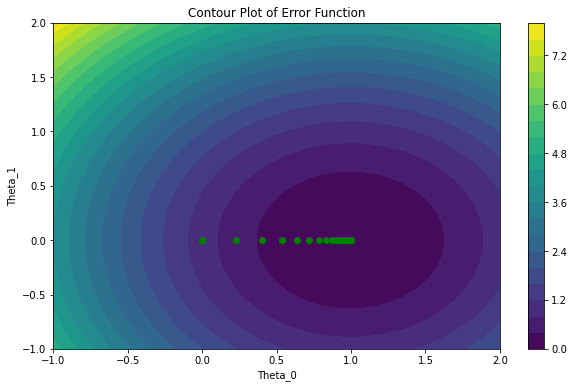

GIF saved as output4.gif


In [13]:
contour_plot(-1, 2, 500, theta_or, 20, 0, 182, 5, 0.1, 4)

In [14]:
X = np.c_[np.ones((100, 1)), DATA1_NOR]
(theta,loss_values,theta0,theta1,Y_val,theta_or) = training_fixed_lr(X,DATA2,0.1,np.array([10e-10]),iteration = 1000000)

Optimized parameters:
Bias: 0.9965923182863626
Weight: 0.0013401586592985775
Loss: 2.390785598542814e-06
No of iteration: 47
Learning Rate: 0.1


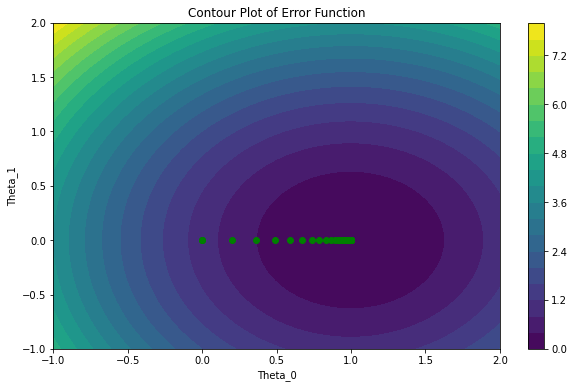

GIF saved as output5.gif


In [15]:
contour_plot (-1, 2, 500, theta_or, 20, 0, 47, 1, 0.1, 5)